In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("diabetes.csv")

glucose = data["Glucose"]

data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1                        0.233   23        0  
2                        0.630   31        1  
3                        0.365   24        1  
4                        0.536   21        0  
...                        ...  ...      ...  
1995                     0.370   33        0  
1996                     0.719   36        1  
1997                     0.382   42        0  
1998                     0.319   26        1  
1999                     0.547   25        0  

[2000 rows x 9 columns]

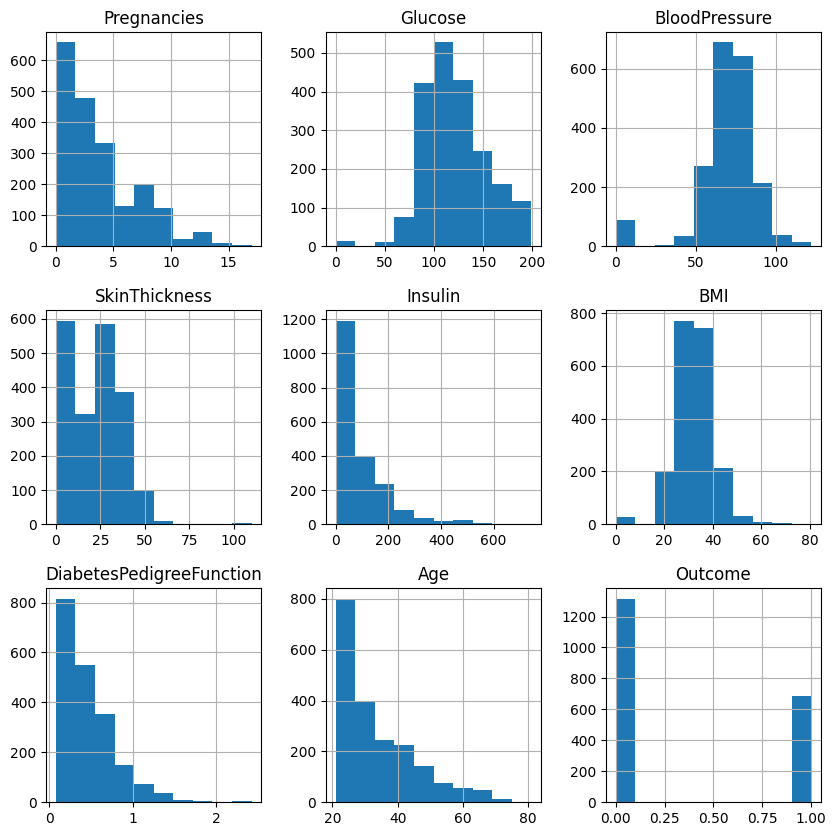

In [3]:
data.hist(bins=10, figsize=(10,10))
plt.show()

In [4]:
data.isnull().values.any()
data.dropna()
np.isfinite(data.all())



Pregnancies                 True
Glucose                     True
BloodPressure               True
SkinThickness               True
Insulin                     True
BMI                         True
DiabetesPedigreeFunction    True
Age                         True
Outcome                     True
dtype: bool

<Axes: >

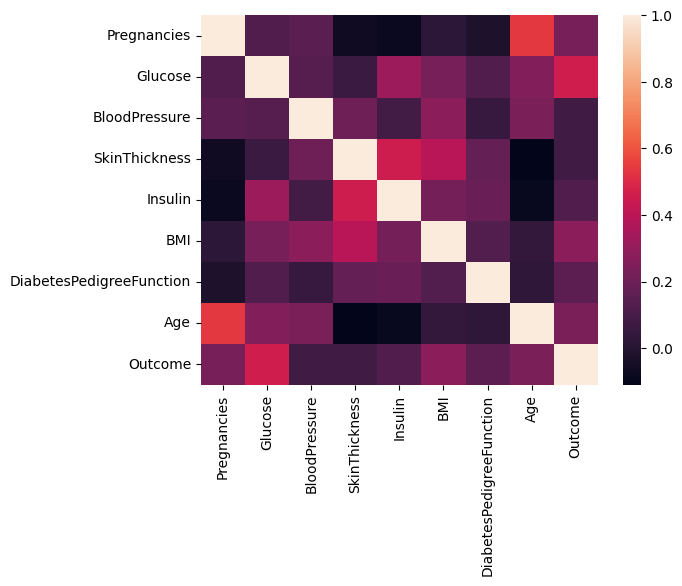

In [5]:
sns.heatmap(data.corr())

<Axes: xlabel='count', ylabel='Outcome'>

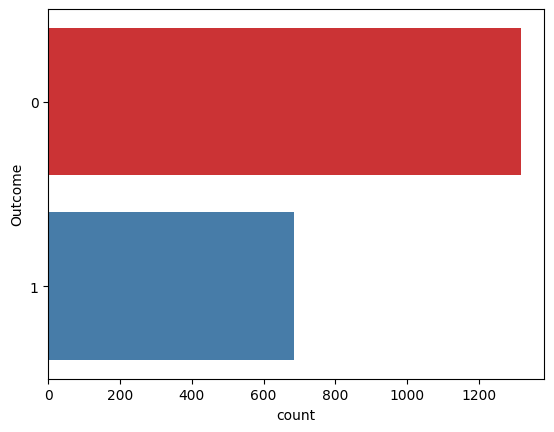

In [6]:
sns.countplot(y=data['Outcome'], palette='Set1')

C:\Users\Ozan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ozan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ozan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to N

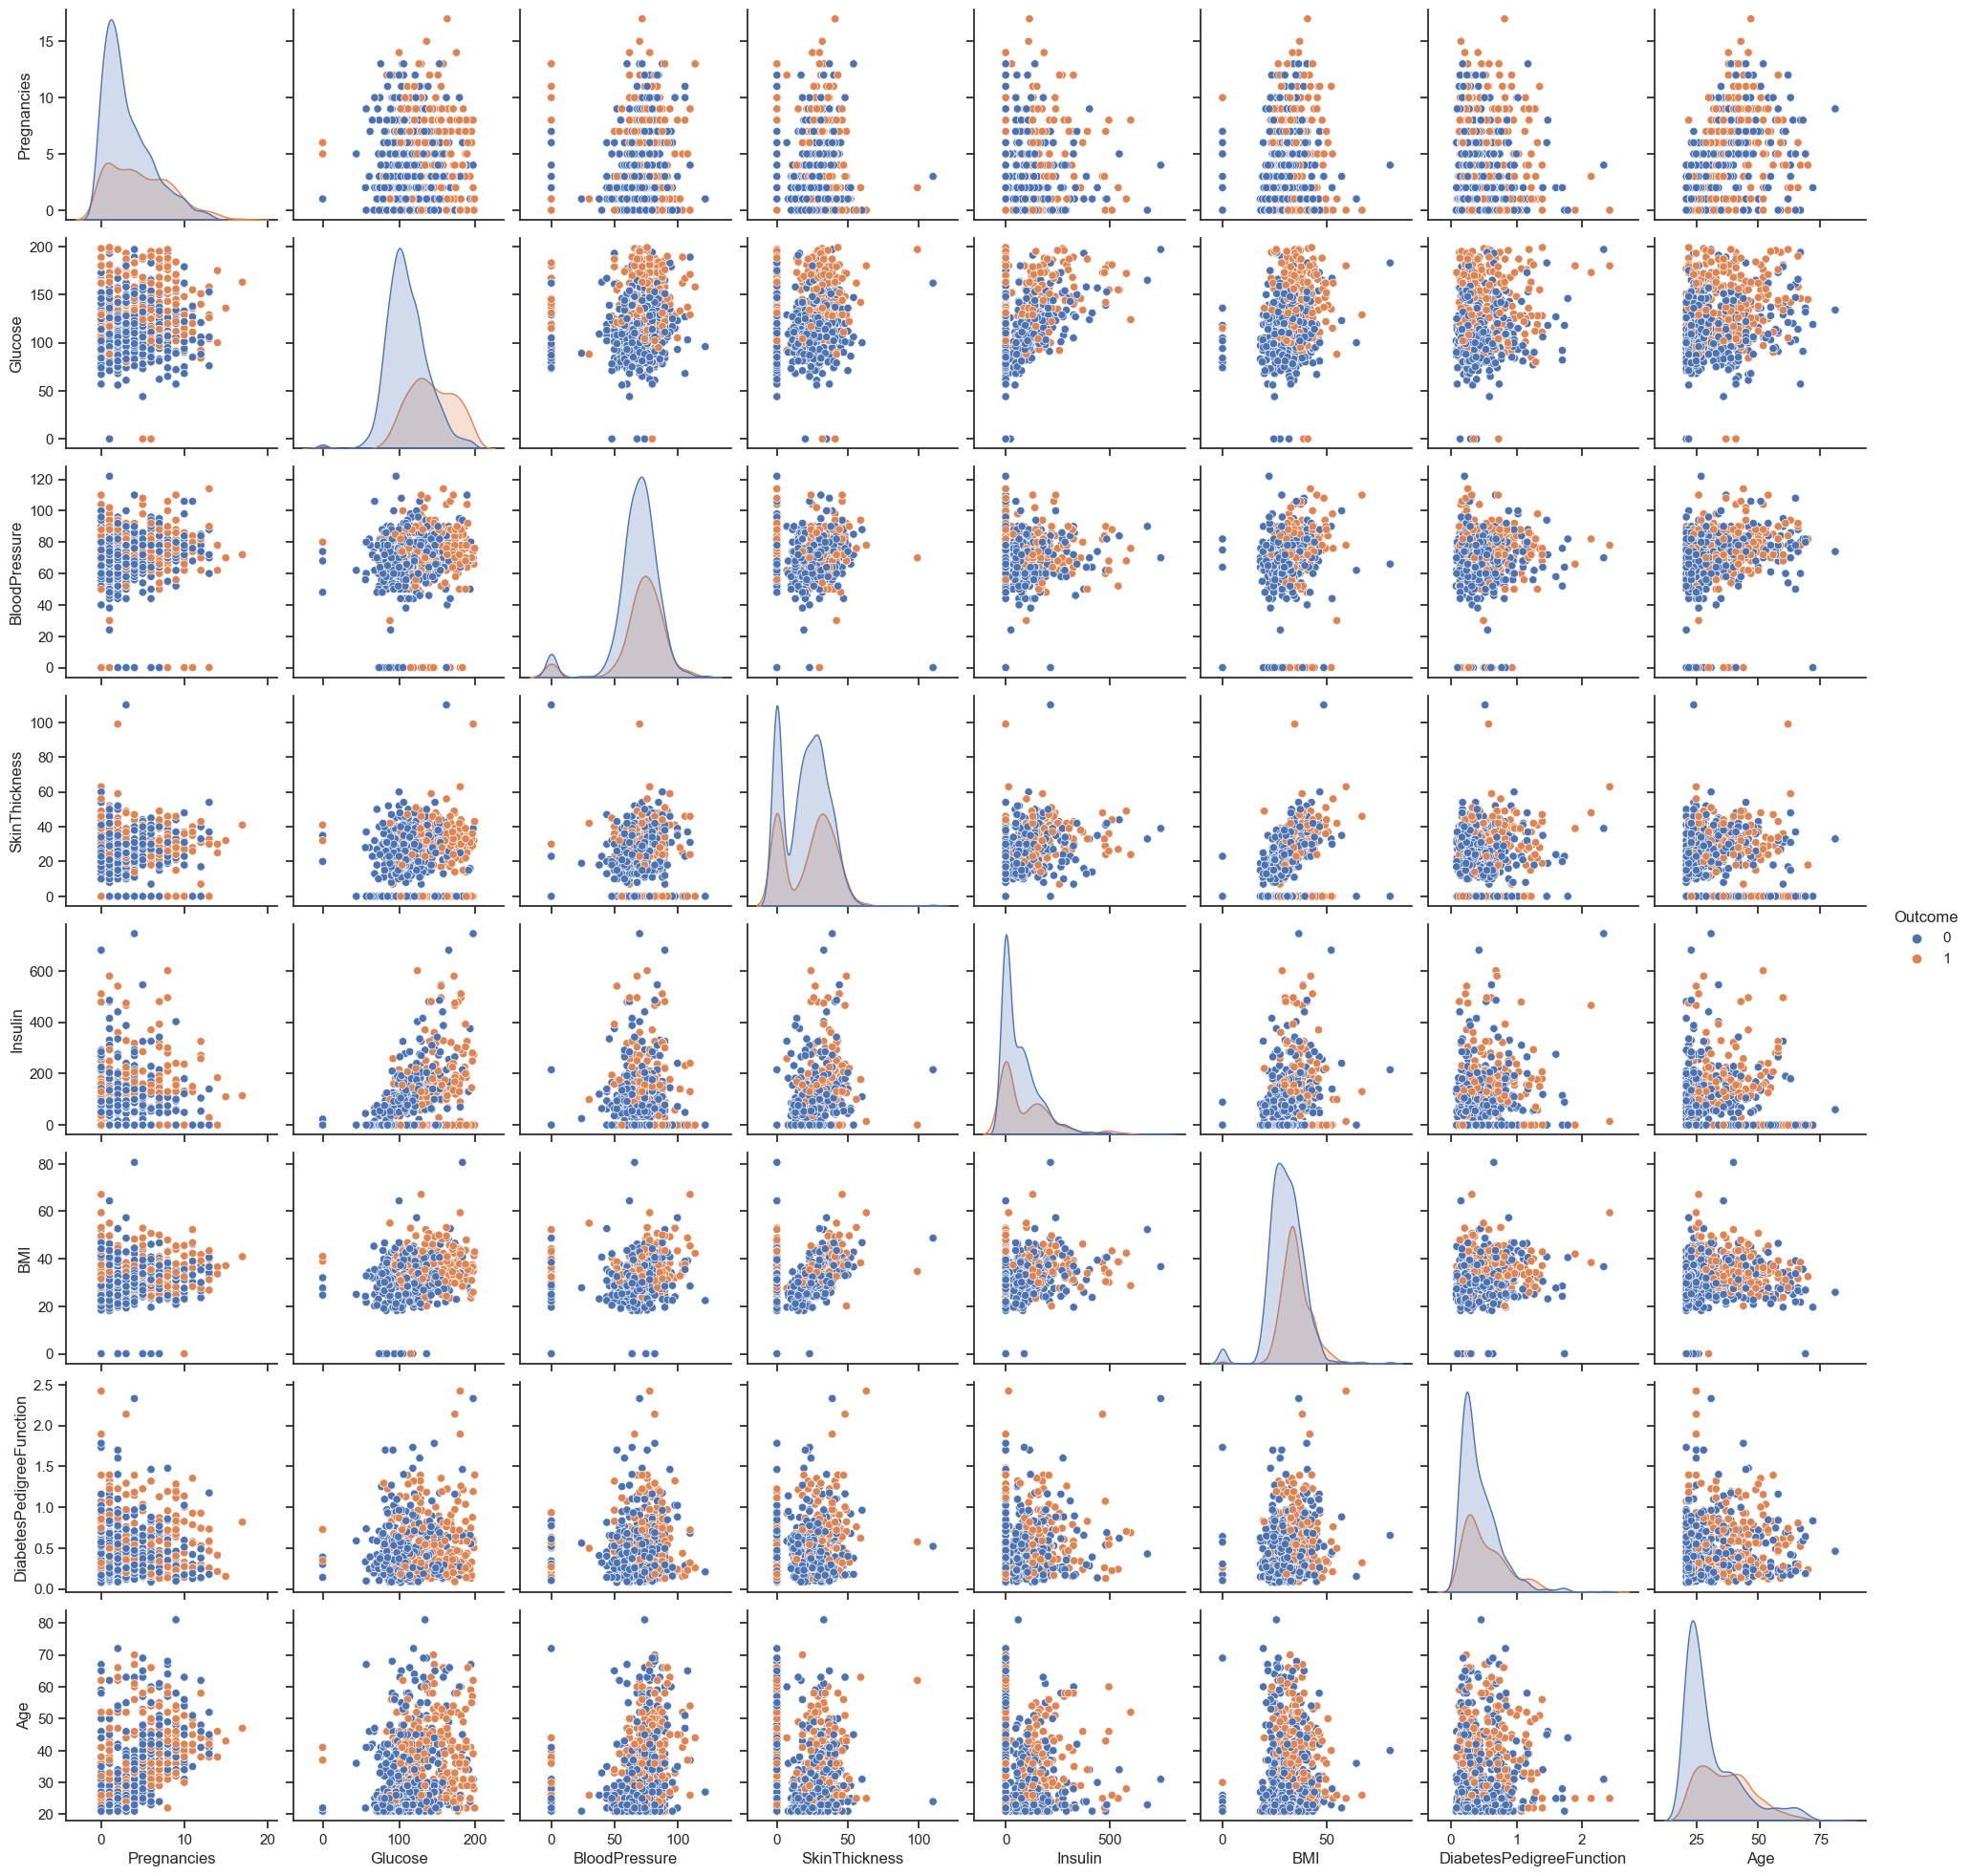

In [7]:
sns.set(style="ticks")
sns.pairplot(data, hue="Outcome")

<Axes: >

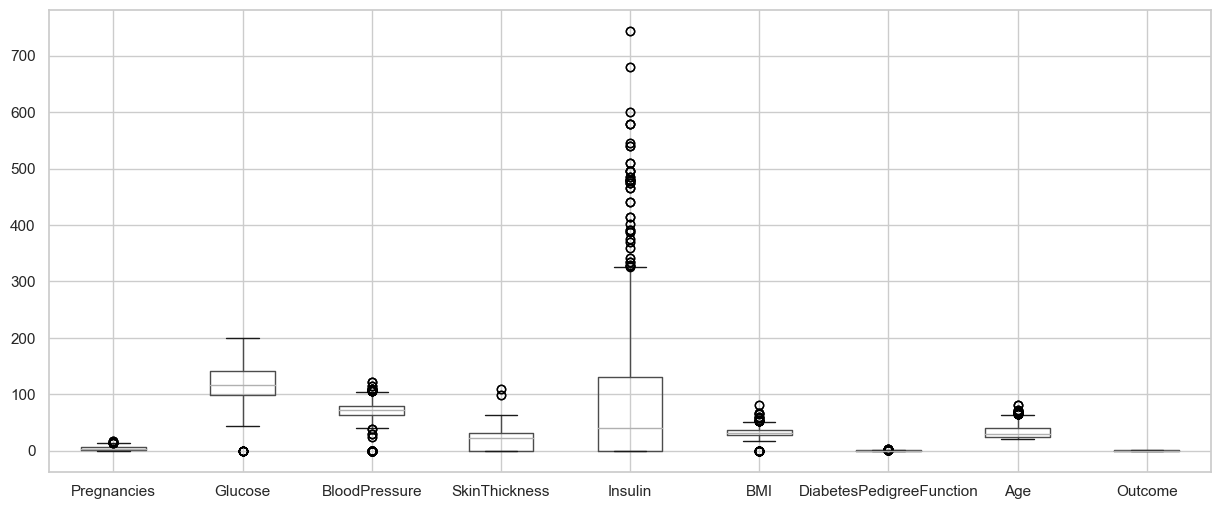

In [8]:
sns.set(style="whitegrid")
data.boxplot(figsize=(15,6))

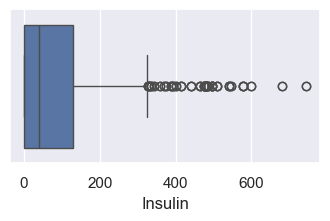

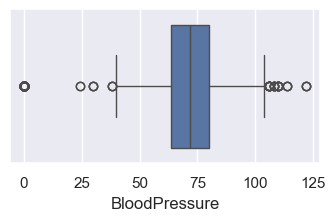

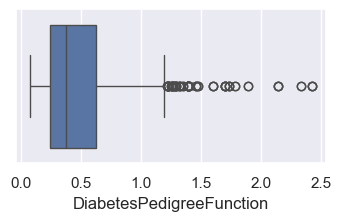

In [12]:
sns.set(style="whitegrid")

sns.set(rc={"figure.figsize" : (4,2)})
sns.boxplot(x=data["Insulin"])
plt.show()
sns.boxplot(x=data["BloodPressure"])
plt.show()
sns.boxplot(x=data["DiabetesPedigreeFunction"])
plt.show()

In [12]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)


---Q1--- 
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                 

In [13]:
df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,df_out.shape

((2000, 9), (1652, 9))

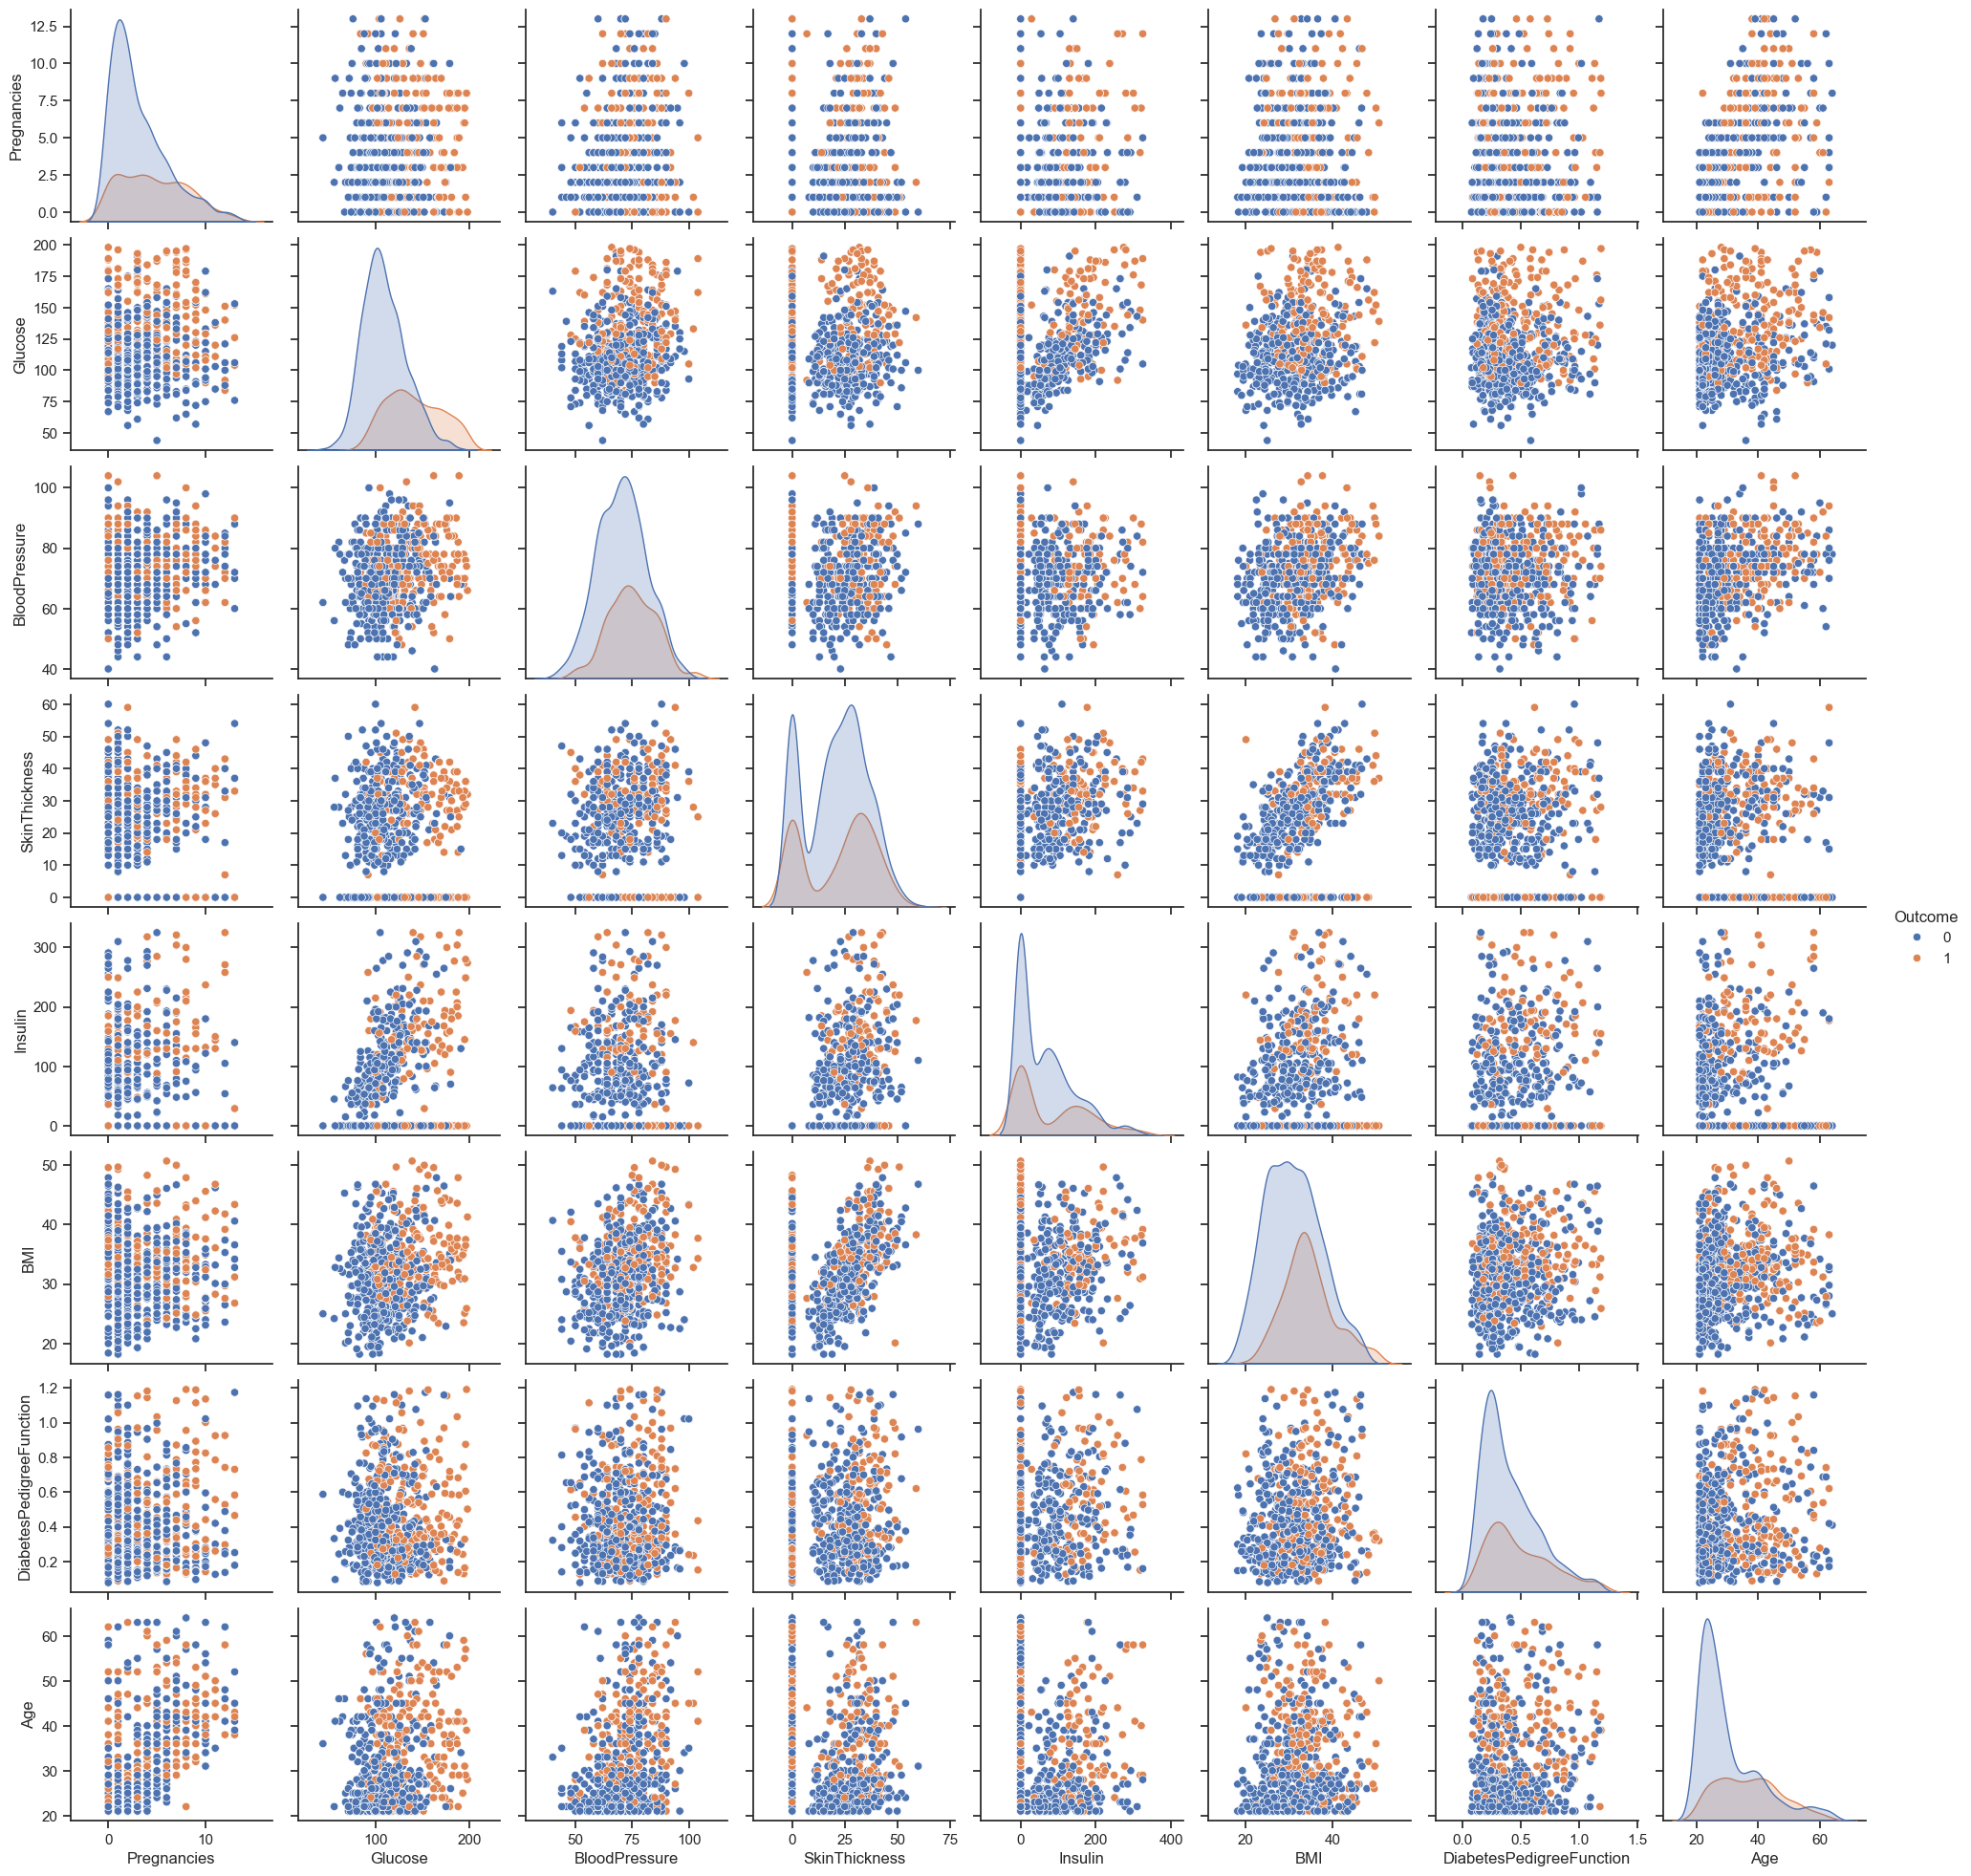

In [15]:
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

In [14]:
X = df_out.drop(columns=["Outcome"])
y = df_out["Outcome"]


In [15]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [16]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1321, 8), (331, 8), (1321,), (331,))

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score ,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred) : return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred) : return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred) : return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred) : return confusion_matrix(y_true, y_pred)[1, 1]

scoring = {'accuracy': make_scorer(accuracy_score), 'prec' : 'precision'}
scoring = {'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn': make_scorer(fn)}


def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
import numpy as np

# 1. Veri ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_X)

# 2. SMOTE ile dengesiz veri dengeleme
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, train_y)

# 3. Hiperparametre optimizasyonu
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_res, y_res)
clf = grid_search.best_estimator_

# 4. Özellik seçimi
sfm = SelectFromModel(clf, threshold="median")
sfm.fit(X_res, y_res)
X_selected = sfm.transform(X_res)
test_X_scaled = scaler.transform(test_X)
test_X_selected = sfm.transform(test_X_scaled)

# 5. Model eğitimi
clf.fit(X_selected, y_res)

# 6. Tahmin ve metrikler
y_pred = clf.predict(test_X_selected)
y_pred_proba = clf.predict_proba(test_X_selected)[:, 1]

ac = accuracy_score(test_y, y_pred)
rc = roc_auc_score(test_y, y_pred_proba)
cm = confusion_matrix(test_y, y_pred)
cr = classification_report(test_y, y_pred)

print("\nAccuracy: {:.4f} ROC: {:.4f}".format(ac, rc))
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)


# 8. Cross-validation
result = cross_validate(clf, X_selected, y_res, scoring=['accuracy', 'roc_auc'], cv=10)
print("\nCross-validation results:")
print("Accuracy (mean):", np.mean(result['test_accuracy']))
print("ROC AUC (mean):", np.mean(result['test_roc_auc']))


Accuracy: 0.9879 ROC: 0.9941
Confusion Matrix:
 [[230   4]
 [  0  97]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       234
           1       0.96      1.00      0.98        97

    accuracy                           0.99       331
   macro avg       0.98      0.99      0.99       331
weighted avg       0.99      0.99      0.99       331


Cross-validation results:
Accuracy (mean): 0.9650552486187844
ROC AUC (mean): 0.9925225885225887


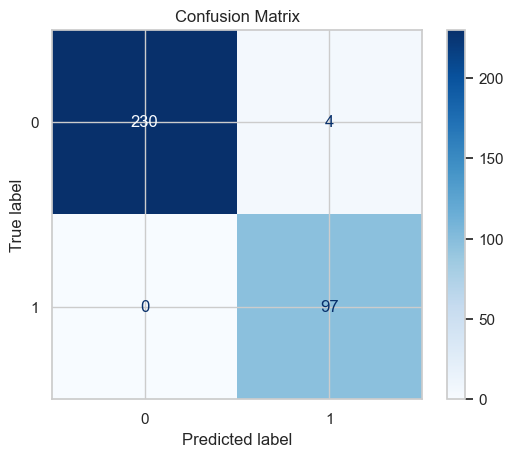

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

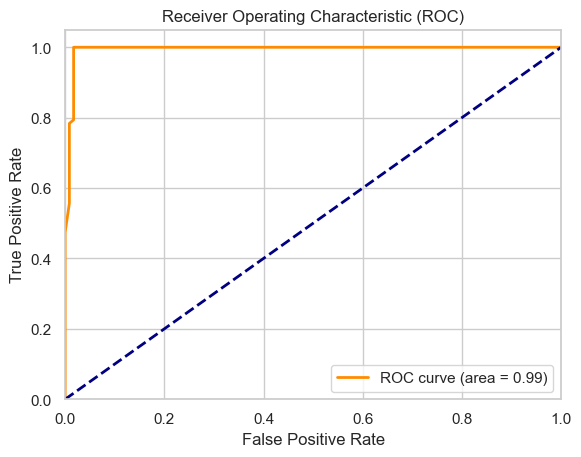

In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

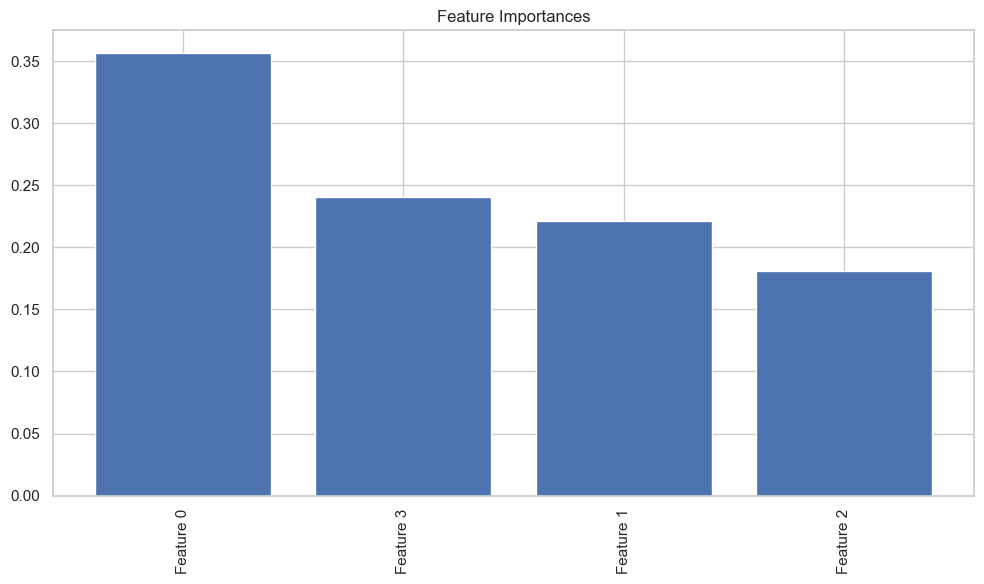

In [28]:
importances = clf.feature_importances_
feature_names = np.array([f"Feature {i}" for i in range(X_selected.shape[1])])  # Özellik isimlerin varsa onları kullanabilirsin

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_selected.shape[1]), importances[indices], align="center")
plt.xticks(range(X_selected.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [29]:
import joblib
joblib.dump(clf, 'diabetes_model.pkl')
joblib.dump(sfm, 'feature_selector.pkl')
joblib.dump(scaler, 'scaler.pkl')

['diabetes_model.pkl']

In [30]:
loaded_model = joblib.load('diabetes_model.pkl')